In [113]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
import pandas as pd
import seaborn as sns

In [75]:
cp = pd.read_csv('cp2.csv', index_col="Unnamed: 0")
cp.rename(columns = {'Unnamed: 0':'tag'}, inplace = True)
overall = cp.tail(3)
overall.rename(columns = {'tag':' '}, inplace = True)
overall.at["accuracy","support"] = 5621
cp = cp.iloc[:-3 , :]

C:\Users\Ali\Anaconda3\envs\DataScienceEnv\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
# Get overall metrics
overall.head()

,precision,recall,f1-score,support
accuracy,0.935509,0.935509,0.935509,5621.0
macro avg,0.693189,0.715625,0.689733,5055.0
weighted avg,0.916926,0.935509,0.921632,5055.0


In [77]:
# Get values that we're predicting poorly
cp.sort_values(by=['f1-score'], ascending =True).head(20)

,precision,recall,f1-score,support
RO,0.000000,0.000000,0.000000,1.0
UPO,0.000000,0.000000,0.000000,25.0
PDVENP,0.000000,0.000000,0.000000,4.0
PEMB,0.000000,0.000000,0.000000,53.0
PTEB,0.000000,0.000000,0.000000,5.0
THPO,0.000000,0.000000,0.000000,1.0
PEEDP,0.000000,0.000000,0.000000,2.0
PTMB,0.000000,0.000000,0.000000,3.0
PDMW,0.000000,0.000000,0.000000,1.0
THNB,0.000000,0.000000,0.000000,1.0


In [78]:
# Values with most support
cp.sort_values(by=['support'], ascending =False).head(20)

,precision,recall,f1-score,support
SVS,0.958389,0.998601,0.978082,715.0
NSE,0.989950,0.949398,0.969250,415.0
LB,1.000000,1.000000,1.000000,376.0
ZE,1.000000,1.000000,1.000000,279.0
VTHOG,0.824074,0.960432,0.887043,278.0
ZM,1.000000,1.000000,1.000000,256.0
ASA,0.964981,0.984127,0.974460,252.0
NSM,0.995816,1.000000,0.997904,238.0
KN,0.990050,1.000000,0.995000,199.0
BS,0.802139,0.892857,0.845070,168.0


In [121]:
# import matplotlib.pylab as plt
# plt.xticks(rotation=‌​45 )
# cp2 = pd.read_csv('cp2.csv')
# cp2.rename(columns = {'Unnamed: 0':'tag'}, inplace = True)
# cp2 = cp2.iloc[:-3 , :]
# dummyframe = cp2.sort_values(by=['support'], ascending =False).head(30)
# 
# dummyframe.head()

,tag,precision,recall,f1-score,support
49,SVS,0.958389,0.998601,0.978082,715.0
15,NSE,0.989950,0.949398,0.969250,415.0
11,LB,1.000000,1.000000,1.000000,376.0
81,ZE,1.000000,1.000000,1.000000,279.0
66,VTHOG,0.824074,0.960432,0.887043,278.0


[Text(0, 0, 'SVS'),
 Text(0, 0, 'NSE'),
 Text(0, 0, 'LB'),
 Text(0, 0, 'ZE'),
 Text(0, 0, 'VTHOG'),
 Text(0, 0, 'ZM'),
 Text(0, 0, 'ASA'),
 Text(0, 0, 'NSM'),
 Text(0, 0, 'KN')]

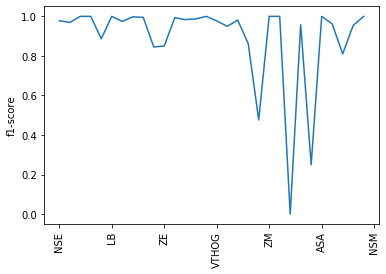

In [130]:
# p1 = sns.lineplot(x=range(0,30), y = dummyframe["f1-score"])
# p1.set_xticklabels(dummyframe.tag,rotation = 90)

In [119]:
# dummyframe['f1-score']
# 

SVS       0.978082
NSE       0.969250
LB        1.000000
ZE        1.000000
VTHOG     0.887043
ZM        1.000000
ASA       0.974460
NSM       0.997904
KN        0.995000
BS        0.845070
PEMP      0.850136
UPI       0.993506
VTUOM     0.983471
PB        0.987342
LO        1.000000
VUOT      0.977273
VVHOG     0.949367
KO        0.981366
VTHOK     0.862275
VTHOO     0.476190
RS        1.000000
PA        1.000000
PEMB      0.000000
NEE       0.957447
UPW       0.250000
PDOENP    1.000000
NM        0.962025
ASP       0.810127
VTUOP     0.953846
UPS       1.000000
Name: f1-score, dtype: float64

In [128]:
# dummyframe['tag']

49       SVS
15       NSE
11        LB
81        ZE
66     VTHOG
82        ZM
2        ASA
16       NSM
9         KN
7         BS
33      PEMP
60       UPI
73     VTUOM
18        PB
12        LO
75      VUOT
76     VVHOG
10        KO
67     VTHOK
68     VTHOO
46        RS
17        PA
32      PEMB
13       NEE
64       UPW
24    PDOENP
14        NM
3        ASP
74     VTUOP
62       UPS
Name: tag, dtype: object